# 파이썬과 케라스로 배우는 강화학습

- 이웅원, 양혁렬, 김건우, 이영무, 이의령 지음

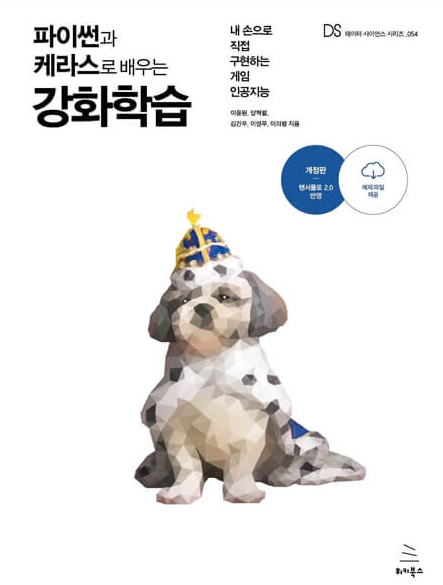

참고 링크: https://github.com/rlcode/reinforcement-learning-kr-v2

수식 마크다운 참고: https://huni0318.github.io/blog/blog-etc/2020-12-21-markdown-tutorial2/

강화학습 참고자료: 
https://sumniya.tistory.com/3

# 저번 시간 복습(강화학습 기초 1편)


강화학습이란?
--

강화학습이란 사전지식이 없어도 시행착오를 통해 학습하는 방법 중 하나를 의미하며, 다른 머신러닝 분야와 다르게 순차적으로 행동을 결정해야 하는 문제를 다룸.

MDP란?
--

순차적 행동 결정 문제를 수학적으로 정의한 것이 MDP입니다. MDP는 상태, 행동, 보상함수, 상태 변환 확률, 할인율로 구성돼 있습니다. 순차적 행동 결정 문제를 푸는 과정은 더 좋은 정책을 찾는 과정입니다.

MDP의 구성요소
--

상태, 행동, 보상함수, 상태 변환 확률, 할인율



**상태**

$ St=s $

- 시간 t에서의 상태

**행동**

$   At=a $

- 시간 t에서의 행동 a

**보상함수**

$ r(s,a) = E[R_{t+1}|S_{t}=s, A_{t}=a] $

- E(Expectation)는 기댓값

- 기댓값은 어떤 정확한 값이 아니라 나오게 될 숫자에 대한 예상임. 상태 s에서 행동 a를 했을 경우에 받을 것이라 예상 되는 숫자

**상태 변환 확률**

$ P^a_{ss}=P[S_{t+1}=s'|S_t=s, A_t=a] $

- P: 확률

- 상태 변환 확률은 상태 s에서 행동 a를 취했을 때, 다른 상태 s'에 도달할 확률

**할인율**

$ \gamma \in [0,1] $

- 할인율의 정의

$ \gamma^{k-1}R_{t+k} $

- $ \gamma^{k-1}$: 미래에 받을 보상이 할인되는 가치
- 더 먼 미래에 받은 보상일수록 현재의 에이전트는 더 작은 값으로 받아들임.
- 할인율을 고려한 미래 보상의 현재 가치
- $k$: 현재로부터 지난 시간


정책
--

$ \pi(a|s)=P[A_t=a|S_t=s] $

- 시간  t에 $S_t=s$에 에이전트가 있을 때, 가능한 행동중에서 $A_t=a$를 할 확률

- 에이전트가 강화학습을 통해 학습해야 할 것은 수많은 정책 중에서 최적 정책임.

에이전트가 어떤 행동을 해야 하는지 정해놓은 것, 최적정책은 제일 좋은 정책이며, 에이전트는 최적 정책에 다라 행동했을 때, 보상의 합을 최대로 받을 수 있습니다. 

가치함수
--

$ v(s) = E[G_t|S_t=s] $

- 여기서 $ G_{t} $는 t시점에서의  반환 값

$ G_t= R_{t+1}+\gamma*R_{t+2}+\gamma^2*R_{t+3}+\gamma^3*R_{t+4}+\gamma^4*R_{t+5} ... $




에이전트가 어떤 정책이 더 좋은 정책인지 판단하는 기준이 가치함수이며, 정의는 다음과 같습니다. 가치함수는 현재 상태로부터 정책을 따라갔을 때 받을 것이라 예상되는 보상의 합입니다.

벨만 기대 방정식
--

$ v_{\pi}(s) = E_{\pi}[R_{t+1}+\gamma v_{\pi}(S_{t+1})|S_t=s] $

정책을 고려한 가치함수로, 벨만 기대 방정식(Bellman Expectation Equation)은 현재 상태의 가치 함수 $ v_{\pi}(s) $와 다음 상태의 가치 함수 
 $ v_{\pi}(S_{t+1}) $ 사이의 관계를 말해주는 방정식


큐함수
--

어떤 상태에서 어떤 행동이 얼마나 좋은지 알려주는 함수

$ q_{\pi}(s,a) $ 

- s는 상태, a는 행동

- 2개의 행동 상태에서 따로 가치함수를 계산


**가치 함수와 큐함수 사이의 관계식**

$ v_{\pi}(s,a) = \sum_{a \in A} \pi (a|s)q_{\pi} (s,a) $ 

- 각 행동을 했을 때, 앞으로 받을 보상인 큐함수 $ q_{\pi} (s,a) = \pi (a|s) $에 곱합니다.

- 모든 행동에 대해 큐함수와 $ \pi (a|s)$를 곱한 값을 더하면 가치함수가 됩니다.

**큐함수의 정의(큐함수의 벨만 기대 방정식)**

$ q_{\pi} (s,a) = E_{\pi}[R_{t+1} + \gamma q{\pi} (S_{t+1}, A_{t+1}) | S_t=s, A_t = a]  $


# 강화학습 기초 2편 (벨만 방정식)

벨만 기대 방정식 vs 벨만 최적 방정식
--


1. 벨만 방정식

- 현재 상태의 가치함수와 다음 상태 가치함수의 관계식이 벨만 방정식 입니다.

2. 벨만 기대 방정식

- 벨만 기대 방정식은 특정 정책을 따라갔을 때 가치함수 사이의 관계식 입니다.

3. 벨만 최적 방정식

- 최적의 정책은 최적의 가치함수를 받게 하는 정책이며, 그 때 가치함수 사이의 관계식이 벨만 최적 방정식입니다.





#밸만 기대 방정식

밸만 기대 방정식

$ v_{\pi}(s)=E_{\pi}[R_{t+1} + \gamma v_{\pi} (S_{t+1}) | S_{t} = s] $

벨만 기대 방정식은 기댓값의 개념이 들어가며, 현재 상태의 가치함수와 다음 상태의 관계를 식으로 나타낸 것


**가치 함수**


$ v(s)=E[R_{t+1}+ \gamma R_{t+2}+ \gamma ^2 R_{t+3} ...| S_{t}=s] $

$ \gamma R_{t+2}$ 부터 뒤의 항을 $ \gamma $ 로 묶어주고 그것을 반환값의 형태로 표현

$ v(s)=E[R_{t+1}+ \gamma (R_{t+2}+ \gamma R_{t+3}) ...| S_{t}=s] $

$ v(s)=E[R_{t+1}+ \gamma G_{t+1}| S_{t}=s] $

- 그러나 에이전트가 실제로 받는 보상이 아님. 이 보상은 앞으로 받을 것이라 예상하는 보상임.

- 따라서 이 부분을 앞으로 받을 보상에 대한 기댓값인 가치함수로 표현. 반환 값을 가치 함수로 바꿔서 표현하면 아래와 같음.

$ v(s) = E[R_{t+1}+\gamma v(S_{t+1})|S_t=s] $

위의 과정을 실제로 계산하려면, 굉장히 비효율 적임.

예시) 1부터 10까지 계산하기

In [ ]:
sum=1+1+1+1+1+1+1+1+1+1
print("1부터 10까지의 합은", sum, "입니다.")

1부터 10까지의 합은 10 입니다.


In [ ]:
X=0

for i in range(10):
    X=X+1
print("1부터 10까지의 합은", X, "입니다.")

1부터 10까지의 합은 10 입니다.


- 위와 같이 X라는 변수를 지정해 그 값에 1을 계속 더해가는 방식이 훨씬 효율적임.

벨만 방정식을 이용하여 가치함수를 두 번째 방식으로 계산한다면 어떻게 계산해야 할까?
--

$ v_{\pi}(s)=E_{\pi}[R_{t+1} + \gamma v_{\pi} (S_{t+1}) | S_{t} = s] $

- 벨만 기대 방정식

- 여기서, =은 ==의 의미가 아닌 =의 의미

즉, 우항 값을 왼쪽 변수에 대입하는 것을 의미하는데, 가치함수가 참 값이라면 성립, 그러나, 그렇지 않다면 좌항과 우항의 값이 다름.

**이 문제를 벨만 기대 방정식을 통해  가치함수를 계속 업데이트하면서, 참값을 구함.**

- 벨만 기대 방정식을 좌항과 우항이 동일해질 때까지( 즉, $ v_{\pi} (s) $ 값이 수렴함)가치함수를 계속 무한히 업데이트하면서 . 이 때,  현재 정책 $\pi$에 대한 참 가치함수를 구한다.

- 참 가치함수: 특정 상태의 가치에 대한 예측 정확도가 높은 가치함수

그러나, 

$ v_{\pi}(s)=E_{\pi}[R_{t+1} + \gamma v_{\pi} (S_{t+1}) | S_{t} = s] $ 

이 식에서 우항을 좌항에 계속 업데이트하여 대입하기 위해서는 기댓값을 계산해야함. 

**How?**

**기댓값의 계산이 가능한 형태로 벨만 기대 방정식을 표현해야함.**


1. 정책

- $ \pi(a|s)=P[A_t=a|S_t=s] $



2. 상태변환확률

- $ P^a_{ss}=P[S_{t+1}=s'|S_t=s, A_t=a] $

3. 보상함수

- $ r(s,a) = E[R_{t+1}|S_{t}=s, A_{t}=a] $

기댓값에는 어떠한 행동을 할 확률 (정책 $ \pi(a|s)) $과 그 행동을 했을 때 어떤 상태로 가게 되는 확률(상태 변환 확률 $P_{ss'}^{a}$)이 포함되어있습니다. 따라서 정책과 상태 변환 확률을 포함해서 계산하면 됩니다. 기댓값의 계산이 가능한 형태로 벨만 기대방정식을 나타내면 아래와 같습니다.



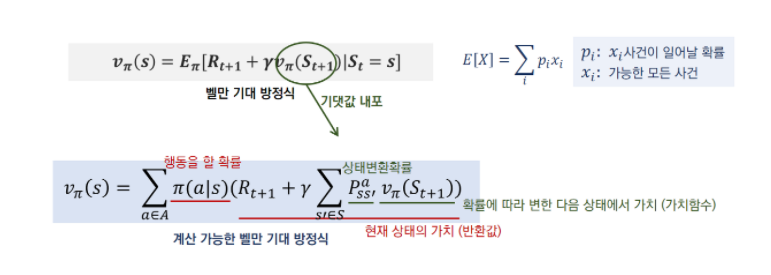

- 여기서 확률은 $ \pi(a|s) $(정책), $ P^a_{ss} $(상태변환확률)

 $ v_{\pi}(s)= \sum_{a \in A} \pi (a|s) (r_(s,a) + \gamma \sum_{s' \in S} P_{ss'}^{a} v_{\pi} (s^{'})) $

- 계산 가능한 벨만 기대 방정식

수식 설명
--

1. 정책을 반영한 가치 함수 유도

$ v(s)=E[R_{t+1}+ \gamma R_{t+2}+ \gamma ^2 R_{t+3} ...| S_{t}=s] $

$ v(s)=E[R_{t+1}+ \gamma (R_{t+2}+ \gamma R_{t+3}) ...| S_{t}=s] $

$ v(s)=E[R_{t+1}+ \gamma G_{t+1}| S_{t}=s] $

$ v(s) = E[R_{t+1}+\gamma v(S_{t+1})|S_t=s] $

$ v_{\pi}(s)=E_{\pi}[R_{t+1} + \gamma v_{\pi} (S_{t+1}) | S_{t} = s] $

$ v_{\pi}(s_{t})=E_{\pi}[R_{t+1} + \gamma v_{\pi} (S_{t+1})] $

$ v_{\pi} (s_{t}) = E_{\pi} [ r_{t+1}+ \gamma r_{t+2} + \gamma^2 v_{\pi} (s_{t+2})] $

2. 특정 시점에서의 큐함수 

$ q_{\pi} (s_{t},a_{t}) = E_{\pi}[R_{t+1} + \gamma q{\pi} (S_{t+1}, A_{t+1})]  $


$ q_{\pi} (s_{t}, a_{t}) = E_{\pi} [ r_{t+1}+ \gamma r_{t+2} + \gamma^2 q_{\pi} (s_{t+2}, a_{t+2})] $


3. 가치 함수와 큐함수의 관계식

$ v_{\pi}(s,a) = \sum_{a \in A} \pi (a|s)q_{\pi} (s,a) $ 

4. 어떤 상태에서 $a1$ 이라는 행동을 했을 때, 큐함수 예시

$ q_{\pi} (s, a_{1}) = r_{s}^{a1} + P_{ss_{1}}^{a_{1}}*v_{\pi} (s_{1}) + P_{ss_{2}}^{a_{1}}*v_{\pi}(s_{2}) $

$ q_{\pi}  (s,a) = r_{s}^a + \gamma \sum_{s' \in S}^a v_{\pi} (s') $

5. 가치 함수와 큐함수의 관계식 응용

1)

$ v_{\pi} (s) = \sum_{a \in A} \pi(a|s) q_{\pi} (s,a) = \sum_{a \in A} \pi(a|s)(r_{s}^{a} + \gamma \sum_{s' \in S} P_{ss'}^{a} v_{\pi}(s'))  $

- 위 식에 $q_{\pi} (s,a)$ 에 
 $ q_{\pi}  (s,a) = r_{s}^a + \gamma \sum_{s' \in S}^a v_{\pi} (s') $ 대입

2)

- 반대로 $v_{\pi}$에 대한 식을 $q_{\pi}$ 에 대한 식에 대입

$ q_{\pi} (s,a) = r_{s}^{a} + \gamma \sum_{s' \in S} P_{ss'}^{a} v_{\pi} (s') = r_{s}^{a} + \gamma \sum_{s' \in S} P_{ss'}^{a} \sum_{a' \in A} \pi(a'|s')q_{\pi}(s',a')  $

- 위 식에 $v_{\pi}(s')$ 부분에  $ v_{\pi}(s') = \sum_{a \in A} \pi (a'|s')q_{\pi} (s',a') 대입 $ 

6. 계산 가능한 벨만 기대 방정식

 $ v_{\pi}(s)= \sum_{a \in A} \pi (a|s) (r_(s,a) + \gamma \sum_{s' \in S} P_{ss'}^{a} v_{\pi} (s^{'})) $

- 출처 및 참고자료: https://myetc.tistory.com/36




그림을 통해 설명하기
--

참고자료: https://dana-study-log.tistory.com/m/entry/%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5-%EC%9D%B4%EB%A1%A0-%EB%B2%A8%EB%A7%8C-%EA%B8%B0%EB%8C%80-%EB%B0%A9%EC%A0%95%EC%8B%9D



1. $s$라는 상태가 있을 때, 선택한 행동을 $a_{1}, a_{2}$

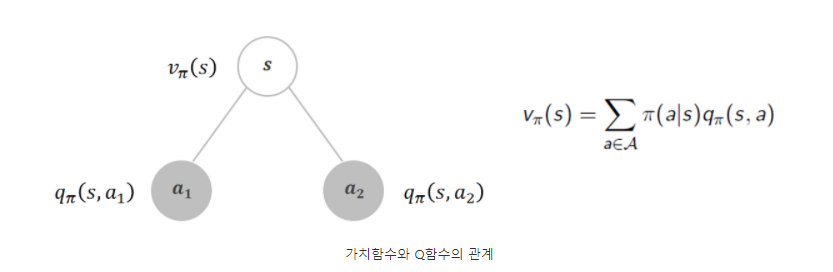

- 큐함수: 어떤 상태에서 어떤 행동이 얼마나 좋은지 알려주는 함수

- 가치함수: 에이전트가 어떤 정책이 더 좋은 정책인지 판단하는 기준

- $ v_{\pi} (s) = \sum_{a \in A} \pi(a|s)q_{\pi}(s,a) $ : 각 행동을 할 확률 π(a|s)와 그 행동을 해서 받는 큐함수 값(예상되는 반환값)을 곱한 것을 더하면 현재 상태 s의 가치함수가 된다는 것

2. 행동을 선택한 후에 주어지는 보상

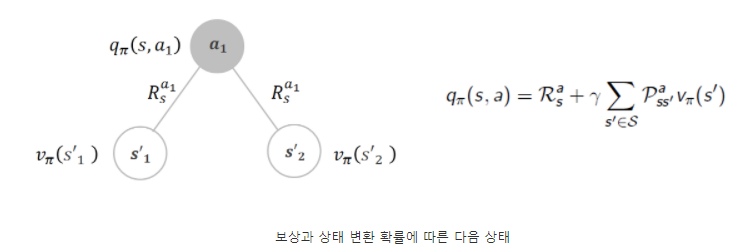

- 보상: $ r(s,a) = E[R_{t+1}|S_{t}=s, A_{t}=a] $

- $q_{\pi} (s,a) = R_{s}^a + \gamma \sum_{s' \in S} P_{ss'}^{a} v_{\pi} (s') $ : 보상과 상태 변환 확률에 따른 다음 상태로,  Q함수는 오른쪽 수식과 같이 특정 행동을 한 뒤 즉시 받는 보상에 행동을 통해 각 다음 상태로 갈 확률 곱하기 해당 다음 상태의 가치함수를 더한 것(한 스텝 지나서 할인율 적용)으로 표현 할 수 있음.

3. 현재 상태의 가치함수와 다음 상태의 가치함수 관계

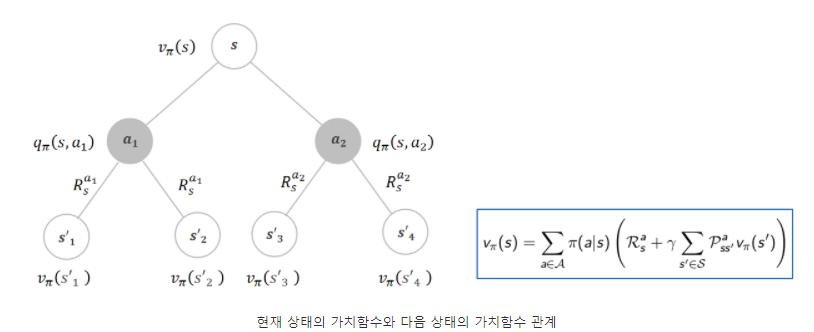

 $ v_{\pi}(s)= \sum_{a \in A} \pi (a|s) (r_(s,a) + \gamma \sum_{s' \in S} P_{ss'}^{a} v_{\pi} (s^{'})) $

**큐함수의 정의(큐함수의 벨만 기대 방정식)**

$ q_{\pi} (s,a) = E_{\pi}[R_{t+1} + \gamma q{\pi} (S_{t+1}, A_{t+1}) | S_t=s, A_t = a] $ 

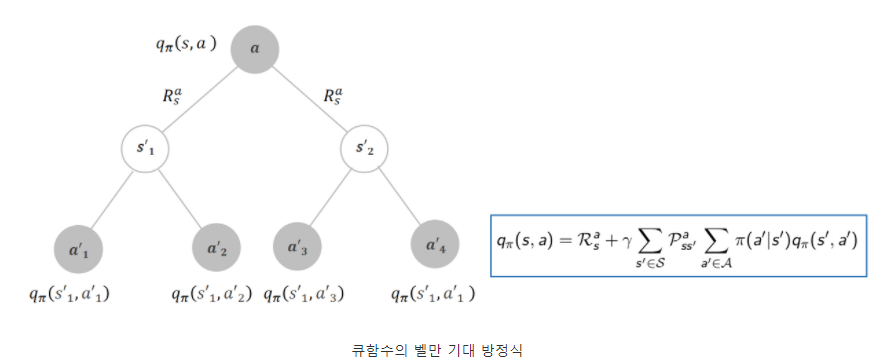

**누가 3줄로 요약 좀?**

**3줄 요약**

1. 각 행동에 대해 그 행동을 할 확률을 고려하고

2. 각 행동을 했을 때 받을 보상과

3. 다음상태의 가치함수를 고려합니다.

너무 어려우니 그리드 월드 사례를 통해 다시 한 번 보기
--

계산이 가능한 벨만 기대 방정식

 $ v_{\pi}(s)= \sum_{a \in A} \pi (a|s) (r_(s,a) + \gamma \sum_{s' \in S} P_{ss'}^{a} v_{\pi} (s^{'})) $

- 그리드 월드에서는 상태 변환 확률을 왼쪽으로 가는 행동을 할 때, 1의 확률로 왼쪽으로 가는 것으로 설정. 따라서 상태변환확률이 1인 벨만 기대 방정식은 아래와 같음

- 오른쪽으로 행동을 취할 경우 회색 별로 표현된 1의 보상을 받음



 $ v_{\pi}(s)= \sum_{a \in A} \pi (a|s) (r_(s,a) +  \gamma v_{\pi} (s^{'})) $

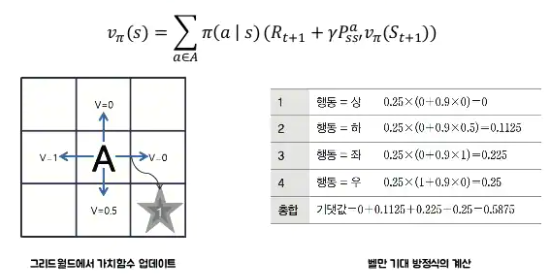


- $ 0.25 == \frac{1}{4}$, 

- $ 0, 1 == 보상 $

- $0.9== \frac{1}{1.1}$


- $0,0.5,1==가치함수 $


- 1) 행동=상 0.25$\times$(0+0.9 $\times$ 0)=0

- 2) 행동=하 0.25$\times$(0+0.9 $\times$0.5)=0.1125

- 3) 행동=좌 0.25$\times$(0+0.9 $\times$ 0) =0.225

- 4) 행동=우 0.25$\times$(1+0.9$\times$0)=0.25

- 총합 기댓값 = 0+0.1125+0.225+0.25=0.5875

- 참고: 그리드월드에서 가치함수의 업데이트

- 상:0, 하:0.5, 좌:1, 우:0



#벨만 최적 방정식


 $ v_{\pi}(s)= E_{\pi}[R_{t+1} + \gamma v_{\pi} (S_{t+1}) | S_{t} = s] $

 $ v_{k+1}(s)$ <- $\sum_{a \in A} \pi (a|s) (r_(s,a) +  \gamma v_{\pi} (s^{'})) $

-  $v_{k+1} (s)$: $k+1$번째 계산한 가치 함수인데, 그 중에서의 상태 $s$의 가치함수

- 기댓값의 계산 가능한 형태의 벨만 기대 방정식

- 위의 식을 통해 현재 정책에 대한 참 가치함수를 구함 (주의: 참 가치함수 $ \neq $ 최적 가치함수)

- 그러나, 단순히 현재 에이전트의 정책에 대한 가치함수를 구한다고 되는 것이 아니라 결국 최적 정책을 찾아야 함.

참고: Why? 참 가치함수 $ \neq $ 최적 가치함수???
--

참가치함수: 

"어떤 정책"을 따라서 움직였을 경우에 받게 되는 보상에 대한 참값. 가치함수의 정의가 현재로 부터 미래까지 받을 보상의 총합인데 이 때, 이 값이 얼마가 될지에 대한 값

최적의 가치함수:

강화학습은 최적 정책을 얻기 위해서 현재의 정책보다 더 좋은 정책을 학습해 나가는 것인데, 이 때, 수 많은 정책 중에서 가장 높은 보상을 얻게 되는 정책을 따랐을 때의 가치함수

단순히 현재 에이전트의 정책에 대한 가치함수를 구한다고 되는 것이 아니라 결국 최적 정책을 찾아야 하는데 HOW??
--

$ V*(s) = max_{\pi} [v_{\pi} (s) ] $

- 최적의 가치함수

- 모든 정책에 대해 가장 큰 가치 함수를 주는 정책이 최적 정책인데, $max_{\pi}$는 모든 가능한 정책에 따른 $v_{\pi} (s)$ 값 중에서 최대를 반환하는 함수

-  최적 가치 함수: 최적 정책을 따라갔을 때 받을 보상의 합

$ q * (s,a) = max_{\pi} [q_{\pi} (s,a)] $

- 최적의 큐함수

- 모든 정책에 대해 가장 큰 가치 함수를 주는 정책이 최적 정책인데, $max_{\pi}$는 모든 가능한 정책에 따른 $q_{\pi} (s)$ 값 중에서 최대를 반환하는 함수

**참고**

가치함수: 현재 상태로부터 정책을 따라갔을 때 받을 것이라 예상되는 보상의 합

큐함수: 어떤 상태에서 어떤 행동이 얼마나 좋은지 알려주는 함수

**최적 정책은 각 상태 s에서의 최적의 큐함수 중에서 가장 큰 큐함수를 가진 행동을 하는 것입니다. 즉, 최적 정책은 언제나 이 큐함수 중에서 가장 높은 행동을 하는 것입니다.**

**HOW??**

최적의 큐함수를 알았을 때, 최적 정책

 $ \pi * (s,a) = 1 $ if $ a= argmax_{a \in A} q*(s,a)$  or  0 otherwise  

- argmax는 $q*$를 최대로 해주는 행동 $a$ 를 반환하는 함수

- 즉, 에이전트가 만약, $q*$를 최대로 해주는 행동 $a$을 했을 때, 1, 그렇지 않으면 0으로 최적 정책을 구성합니다.

**그렇다면 최적의 가치함수를 어떻게 구하나요??**

잘개 쪼개서, 반복적으로 계산합니다. 이는 다이내믹 프로그래밍의 개념을 알아야 하기 때문에 뒤에서 다뤄보도록 하겠습니다.

최적의 가치함수끼리는 관계가 어떻게 되나요??
--

$ V*(s) = max_{\pi} [v_{\pi} (s) ] $

- 최적의 가치 함수


-  $max_{\pi}$는 모든 가능한 정책에 따른 $v_{\pi} (s)$ 값 중에서 최대를 반환하는 함수





벨만 방정식은 현재 상태의 가치함수와 다음 타임스텝 상태의 가치함수 사이의 관계 식

최적이라는 것은 에이전트가 가장 좋은 행동을 선택한다는 것. 에이전트가 무엇을 기준으로 어떤 행동이 가장 좋은지 아는 것이 바로 큐함수

가치 함수와 큐함수의 관계식 

$ v_{\pi}(s,a) = \sum_{a \in A} \pi (a|s)q_{\pi} (s,a) $ 

선택의 기준이 되는 큐함수가 최적의 큐함수가 아니라면 아무리 에이전트가 큐함수 중 최대를 선택해도 가치함수는 최적의 가치 함수가 되지 않음. 따라서 아래 식과 같이 최적의 큐함수 중에서 max를 취하는 것이 최적의 가치함수가 됨.

$ v*(s) = max_{a} [q*(s,a) | S_{t} = s, A_{t} = a] $

- 큐함수 중 최대를 선택하는 최적 가치함수

이를 가치함수로 고치면 아래 식과 같음


기존 가치 함수:

$ v(s) = E[G_t|S_t=s] $

$ G_t= R_{t+1}+\gamma*R_{t+2}+\gamma^2*R_{t+3}+\gamma^3*R_{t+4}+\gamma^4*R_{t+5} ... $





큐함수 중 최대를 선택하는 최적 가치함수에서 큐함수를 가치함수로 고쳐서 표현

$ v*(s) = max_{a} [q*(s,a) | S_{t} = s, A_{t} = a] $

$ v*(s) = max_{a} E[R_{t+1} + \gamma v*(S_{t+1}) | S_{t} = s, A_{t} = a] $

- 이를 벨만 최적 방정식이라고 부름

큐함수에 대해서도 벨만 최적 방정식을 표현할 수 있는데 아래 수식과 같음.

$ q*(s,a)=E[R_{t+1} + \gamma max_{a'}q*(S_{t+1}, a')|S_{t} = s, A_{t} = a] $

- $E$가 있는 이유는 다음 상태가 상태 변환 확률에 따라 달라지기 때문

벨만 기대 방정식과 벨만 최적 방정식을 이용해 MDP로 정의되는 문제를 "계산"으로 푸는 방법이 바로 다이내믹 프로그래밍(Dynamic programming)이다.

# 다이내믹 프로그래밍(Dynamic programming)

다이내믹 프로그래밍이란?
--


다이내믹 프로그래밍은 작은 문제가 큰 문제 안에 중첩돼 있는 경우에 작은 문제의 답을 다른 작은 문제를 이용함으로써 효율적으로 계산하는 방법입니다.

지친 여러분 들을 위한 다이내믹 프로그래밍 관련 재밌는 영상
--

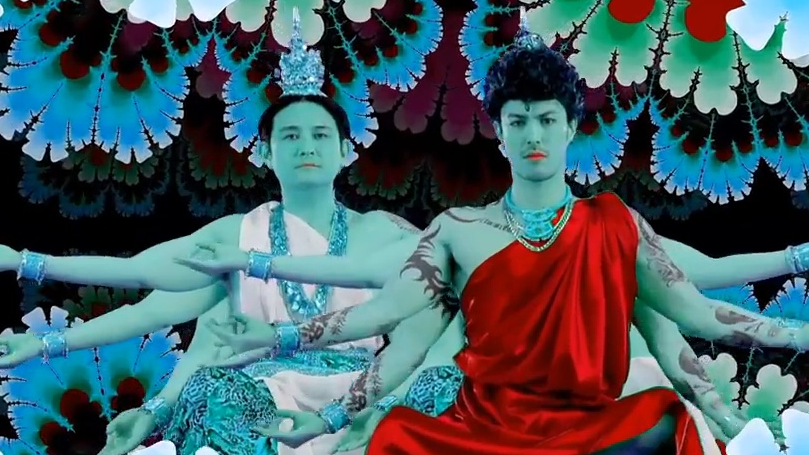

노라조 - 니 팔자야 MV (1분 20초까지)

https://www.youtube.com/watch?v=s0UjELAUMjE


다이내믹 프로그래밍의 기본적인 아이디어는 큰 문제 안에 작은 문제들이 중첩된 경우에 전체 큰 문제를 작은 문제로 쪼개서 풀겠다는 것입니다.

다이내믹 프로그래밍과 벨만 방정식의 관계??
--

다이내믹 프로그래밍으로 벨만 기대 방정식을 푸는 것이 정책 이터레이션,

벨만 최적 방정식을 푸는 것이 가치 이터레이션입니다. 

다이내믹 프로그래밍
--

다이내믹 프로그래밍을 만든 사람 또한, 벨만

이 쯤에서 살펴보는 벨만, 그는 대체 누구인가??
--

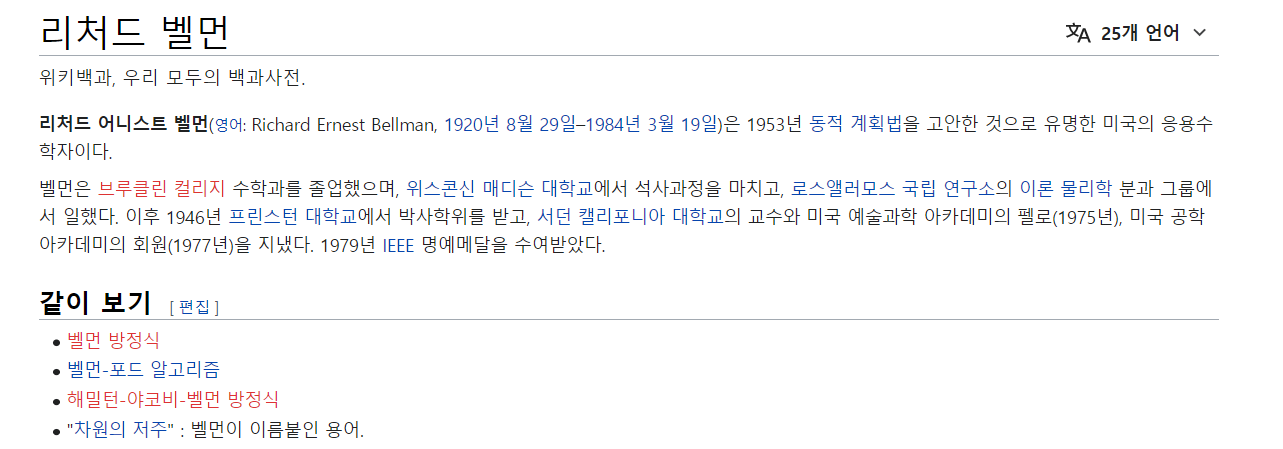

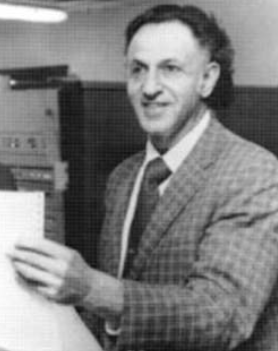

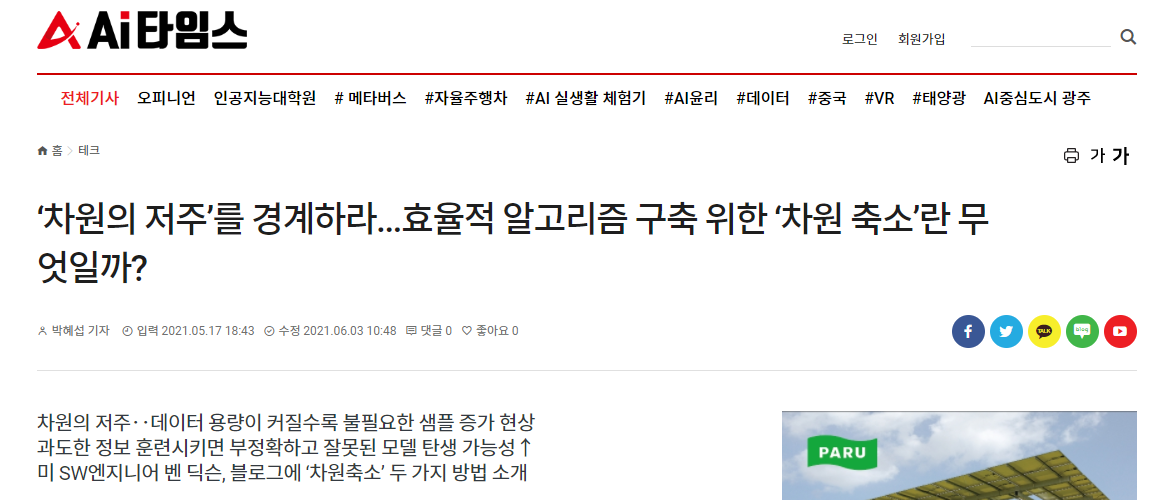

- 수업 시간에 나왔던 차원의 저주는 벨먼이 이름붙인 용어이다.

다이내믹 프로그래밍
--

벨만이 만든 다이내믹 프로그래밍은 강화학습에 근간이 되었는데, 큰 문제 안에 작은 문제들이 중첩된 경우에 전체 큰 문제를 작은 문제로 쪼개서 풀겠다는 이 다이내믹 프로그래밍의 한계를 극복하고자 학습을 사용한 것이 바로 강화학습입니다.

순차적 행동 결정 문제를 풀어나가는 과정

1. 순차적 행동 문제를 MDP로 전환한다.

2. 가치함수를 벨만 방정식으로 반복적으로 계산한다.

3. 최적 가치함수와 최적정책 찾는다.

- 강화학습은 순차적으로 행동을 결정해야 하는 문제를 푸는 방법 중 하나

- 이 강화학습보다 먼저 벨만 방정식을 푸는 알고리즘이 존재했는데, 바로 다이내믹 프로그래밍입니다.

다이내믹 프로그래밍 의미

- 다이내믹: 대상이 시간에 따라 변한다는 것을 의미

- 프로그래밍: 계획을 하는 것으로 여러 프로세스가 다단계로 이뤄지는 것

다이내믹 프로그래밍의 기본적인 아이디어는 큰 문제 안에 작은 문제들이 중첩된 경우에 전체 큰 문제를 작은 문제로 쪼개서 풀겠다는 것입니다.

- 여기서, 작은 문제들이 하나의 프로세스가 되는 것입니다.

- 이 때, 이 작은 문제들을 다단계로 풀어나가는 것이 프로그래밍이 되는 것입니다.

- 하나의 프로세스를 대상으로 문제를 풀어나가는 것이 아니라 시간에 따라 다른 프로세스들을 풀어나가기 때문에 다이내믹 프로그래밍이라고 부르는 것입니다.

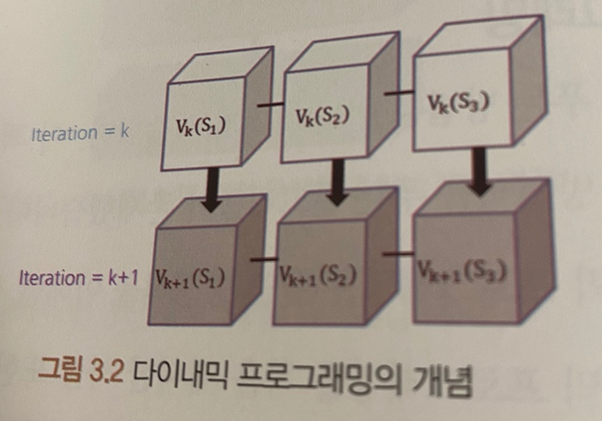

- 다이내믹 프로그래밍은 큰 문제를 바로 푸는 것이 아니라, 작은 문제들을 풀어나갑니다.

- 이 때, 각각의 작은 문제들이 별개가 아니기 때문에 작은 문제들의 해답을 서로서로 이용할 수 있습니다.

- 이 특성을 이용하면 결과적으로 계산량을 줄일 수 있습니다.

- 쉽게 말하면, 팀플을 하는 이유를 생각하면 편함.

앞에서 최적의 가치함수를 구하는 방법에 대해 다이내믹 프로그래밍에 대한 설명을 하고 하기 위해 뒤로 넘겼었음.

**그렇다면 최적의 가치함수를 어떻게 구하나요??**

잘개 쪼개서, 반복적으로 계산합니다. 이는 다이내믹 프로그래밍의 개념을 알아야 하기 때문에 뒤에서 다뤄보도록 하겠습니다..

이에 대해 가볍게 설명해보겠습니다.

가치함수를 구하는 과정을 작은 과정으로 쪼개서 반복적으로 계산한다.

$ v_{0} (s) \rightarrow v_{1} (s) \rightarrow ... \rightarrow v_{k}(s) \rightarrow v_{\pi}(s) $

$ \rightarrow $ 는 한 번의 계산으로서 $iteration = k$에서 $iteration = k+1$이 되는 과정이며, 이  계산은 모든 상태에 대해 하며 한 번 계산이 끝나면 모든 상태의 가치함수를 업데이트 합니다. 이런 식으로 이전의 정보를 이용해 효율적으로 가치함수를 업데이트 할 수 있음.

다이내믹 프로그래밍에는 크게 정책 이터레이션(Policy Iteration)과 가치 이터레이션(Value Iteration)이 있습니다.

정책 이터레이션은 벨만 기대 방정식을 이용하여 순차적인 행동 결정 문제를 풀고, 

가치 이터레이션은 벨만 최적 방정식을 이용하여 문제를 풉니다.

이렇게 강화학습의 기본적인 알고리즘에 대해서 우리는 이번 시간까지 알아봤습니다.
--

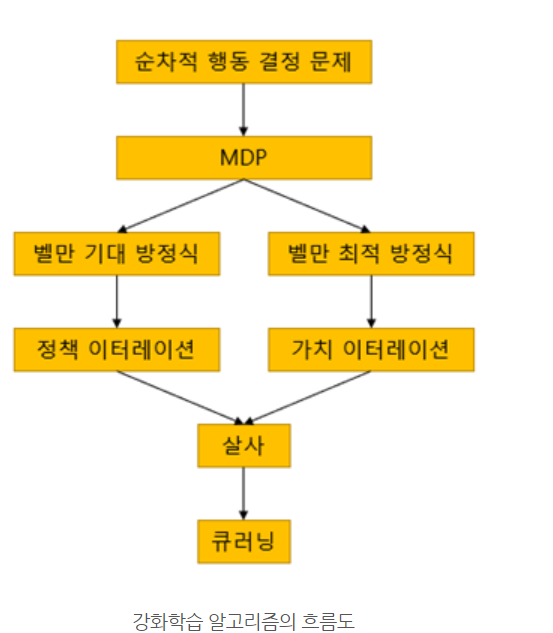

다음 시간에는 정책 이터레이션과 가치 이터레이션에 대해서 자세히 알아보도록 하겠습니다.

다음 시간 맛보기 (코드 맛보기)
--

- 코드 리뷰는 정책 이터레이션과 가치 이터레이션 진도가 다 끝나면 하도록 하겠습니다.^^

그리드 월드 환경세팅

In [ ]:
!pip install environment

In [ ]:
import environment

In [ ]:
import tkinter as tk
from tkinter import Button
import time
import numpy as np
from PIL import ImageTk, Image

PhotoImage = ImageTk.PhotoImage
UNIT = 100  # 픽셀 수
HEIGHT = 5  # 그리드월드 세로
WIDTH = 5  # 그리드월드 가로
TRANSITION_PROB = 1
POSSIBLE_ACTIONS = [0, 1, 2, 3]  # 좌, 우, 상, 하
ACTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # 좌표로 나타낸 행동
REWARDS = []


class GraphicDisplay(tk.Tk):
    def __init__(self, agent):
        super(GraphicDisplay, self).__init__()
        self.title('Policy Iteration')
        self.geometry('{0}x{1}'.format(HEIGHT * UNIT, HEIGHT * UNIT + 50))
        self.texts = []
        self.arrows = []
        self.env = Env()
        self.agent = agent
        self.evaluation_count = 0
        self.improvement_count = 0
        self.is_moving = 0
        (self.up, self.down, self.left, self.right), self.shapes = self.load_images()
        self.canvas = self._build_canvas()
        self.text_reward(2, 2, "R : 1.0")
        self.text_reward(1, 2, "R : -1.0")
        self.text_reward(2, 1, "R : -1.0")

    def _build_canvas(self):
        canvas = tk.Canvas(self, bg='white',
                           height=HEIGHT * UNIT,
                           width=WIDTH * UNIT)
        # 버튼 초기화
        iteration_button = Button(self, text="Evaluate",
                                  command=self.evaluate_policy)
        iteration_button.configure(width=10, activebackground="#33B5E5")
        canvas.create_window(WIDTH * UNIT * 0.13, HEIGHT * UNIT + 10,
                             window=iteration_button)
        policy_button = Button(self, text="Improve",
                               command=self.improve_policy)
        policy_button.configure(width=10, activebackground="#33B5E5")
        canvas.create_window(WIDTH * UNIT * 0.37, HEIGHT * UNIT + 10,
                             window=policy_button)
        policy_button = Button(self, text="move", command=self.move_by_policy)
        policy_button.configure(width=10, activebackground="#33B5E5")
        canvas.create_window(WIDTH * UNIT * 0.62, HEIGHT * UNIT + 10,
                             window=policy_button)
        policy_button = Button(self, text="reset", command=self.reset)
        policy_button.configure(width=10, activebackground="#33B5E5")
        canvas.create_window(WIDTH * UNIT * 0.87, HEIGHT * UNIT + 10,
                             window=policy_button)

        # 그리드 생성
        for col in range(0, WIDTH * UNIT, UNIT):  # 0~400 by 80
            x0, y0, x1, y1 = col, 0, col, HEIGHT * UNIT
            canvas.create_line(x0, y0, x1, y1)
        for row in range(0, HEIGHT * UNIT, UNIT):  # 0~400 by 80
            x0, y0, x1, y1 = 0, row, HEIGHT * UNIT, row
            canvas.create_line(x0, y0, x1, y1)

        # 캔버스에 이미지 추가
        self.rectangle = canvas.create_image(50, 50, image=self.shapes[0])
        canvas.create_image(250, 150, image=self.shapes[1])
        canvas.create_image(150, 250, image=self.shapes[1])
        canvas.create_image(250, 250, image=self.shapes[2])

        canvas.pack()

        return canvas

    def load_images(self):
        up = PhotoImage(Image.open("../img/up.png").resize((13, 13)))
        right = PhotoImage(Image.open("../img/right.png").resize((13, 13)))
        left = PhotoImage(Image.open("../img/left.png").resize((13, 13)))
        down = PhotoImage(Image.open("../img/down.png").resize((13, 13)))
        rectangle = PhotoImage(Image.open("../img/rectangle.png").resize((65, 65)))
        triangle = PhotoImage(Image.open("../img/triangle.png").resize((65, 65)))
        circle = PhotoImage(Image.open("../img/circle.png").resize((65, 65)))
        return (up, down, left, right), (rectangle, triangle, circle)

    def reset(self):
        if self.is_moving == 0:
            self.evaluation_count = 0
            self.improvement_count = 0
            for i in self.texts:
                self.canvas.delete(i)

            for i in self.arrows:
                self.canvas.delete(i)
            self.agent.value_table = [[0.0] * WIDTH for _ in range(HEIGHT)]
            self.agent.policy_table = ([[[0.25, 0.25, 0.25, 0.25]] * WIDTH
                                        for _ in range(HEIGHT)])
            self.agent.policy_table[2][2] = []
            x, y = self.canvas.coords(self.rectangle)
            self.canvas.move(self.rectangle, UNIT / 2 - x, UNIT / 2 - y)

    def text_value(self, row, col, contents, font='Helvetica', size=10,
                   style='normal', anchor="nw"):
        origin_x, origin_y = 85, 70
        x, y = origin_y + (UNIT * col), origin_x + (UNIT * row)
        font = (font, str(size), style)
        text = self.canvas.create_text(x, y, fill="black", text=contents,
                                       font=font, anchor=anchor)
        return self.texts.append(text)

    def text_reward(self, row, col, contents, font='Helvetica', size=10,
                    style='normal', anchor="nw"):
        origin_x, origin_y = 5, 5
        x, y = origin_y + (UNIT * col), origin_x + (UNIT * row)
        font = (font, str(size), style)
        text = self.canvas.create_text(x, y, fill="black", text=contents,
                                       font=font, anchor=anchor)
        return self.texts.append(text)

    def rectangle_move(self, action):
        base_action = np.array([0, 0])
        location = self.find_rectangle()
        self.render()
        if action == 0 and location[0] > 0:  # 상
            base_action[1] -= UNIT
        elif action == 1 and location[0] < HEIGHT - 1:  # 하
            base_action[1] += UNIT
        elif action == 2 and location[1] > 0:  # 좌
            base_action[0] -= UNIT
        elif action == 3 and location[1] < WIDTH - 1:  # 우
            base_action[0] += UNIT
        # move agent
        self.canvas.move(self.rectangle, base_action[0], base_action[1])

    def find_rectangle(self):
        temp = self.canvas.coords(self.rectangle)
        x = (temp[0] / 100) - 0.5
        y = (temp[1] / 100) - 0.5
        return int(y), int(x)

    def move_by_policy(self):
        if self.improvement_count != 0 and self.is_moving != 1:
            self.is_moving = 1

            x, y = self.canvas.coords(self.rectangle)
            self.canvas.move(self.rectangle, UNIT / 2 - x, UNIT / 2 - y)

            x, y = self.find_rectangle()
            while len(self.agent.policy_table[x][y]) != 0:
                self.after(100,
                           self.rectangle_move(self.agent.get_action([x, y])))
                x, y = self.find_rectangle()
            self.is_moving = 0

    def draw_one_arrow(self, col, row, policy):
        if col == 2 and row == 2:
            return

        if policy[0] > 0:  # up
            origin_x, origin_y = 50 + (UNIT * row), 10 + (UNIT * col)
            self.arrows.append(self.canvas.create_image(origin_x, origin_y,
                                                        image=self.up))
        if policy[1] > 0:  # down
            origin_x, origin_y = 50 + (UNIT * row), 90 + (UNIT * col)
            self.arrows.append(self.canvas.create_image(origin_x, origin_y,
                                                        image=self.down))
        if policy[2] > 0:  # left
            origin_x, origin_y = 10 + (UNIT * row), 50 + (UNIT * col)
            self.arrows.append(self.canvas.create_image(origin_x, origin_y,
                                                        image=self.left))
        if policy[3] > 0:  # right
            origin_x, origin_y = 90 + (UNIT * row), 50 + (UNIT * col)
            self.arrows.append(self.canvas.create_image(origin_x, origin_y,
                                                        image=self.right))

    def draw_from_policy(self, policy_table):
        for i in range(HEIGHT):
            for j in range(WIDTH):
                self.draw_one_arrow(i, j, policy_table[i][j])

    def print_value_table(self, value_table):
        for i in range(WIDTH):
            for j in range(HEIGHT):
                self.text_value(i, j, round(value_table[i][j], 2))

    def render(self):
        time.sleep(0.1)
        self.canvas.tag_raise(self.rectangle)
        self.update()

    def evaluate_policy(self):
        self.evaluation_count += 1
        for i in self.texts:
            self.canvas.delete(i)
        self.agent.policy_evaluation()
        self.print_value_table(self.agent.value_table)

    def improve_policy(self):
        self.improvement_count += 1
        for i in self.arrows:
            self.canvas.delete(i)
        self.agent.policy_improvement()
        self.draw_from_policy(self.agent.policy_table)


class Env:
    def __init__(self):
        self.transition_probability = TRANSITION_PROB
        self.width = WIDTH
        self.height = HEIGHT
        self.reward = [[0] * WIDTH for _ in range(HEIGHT)]
        self.possible_actions = POSSIBLE_ACTIONS
        self.reward[2][2] = 1  # (2,2) 좌표 동그라미 위치에 보상 1
        self.reward[1][2] = -1  # (1,2) 좌표 세모 위치에 보상 -1
        self.reward[2][1] = -1  # (2,1) 좌표 세모 위치에 보상 -1
        self.all_state = []

        for x in range(WIDTH):
            for y in range(HEIGHT):
                state = [x, y]
                self.all_state.append(state)

    def get_reward(self, state, action):
        next_state = self.state_after_action(state, action)
        return self.reward[next_state[0]][next_state[1]]

    def state_after_action(self, state, action_index):
        action = ACTIONS[action_index]
        return self.check_boundary([state[0] + action[0], state[1] + action[1]])

    @staticmethod
    def check_boundary(state):
        state[0] = (0 if state[0] < 0 else WIDTH - 1
                    if state[0] > WIDTH - 1 else state[0])
        state[1] = (0 if state[1] < 0 else HEIGHT - 1
                    if state[1] > HEIGHT - 1 else state[1])
        return state

    def get_transition_prob(self, state, action):
        return self.transition_probability

    def get_all_states(self):
        return self.all_state

policy_iteration (정책 이터레이션의 알고리즘 관련 함수 맛보기)

In [ ]:
import numpy as np

class PolicyIteration:
    def __init__(self, env):
        # 환경에 대한 객체 선언
        self.env=env
        # 가치함수를 2차원 리스트로 초기화
        self.value_table=[[0,0]*env.width for _ in range(env.height)]
        # 상하좌우 동일한 확률로 정책 초기화
        self.policy_table=[[[0.25,0.25,0.25,0.25]]*env.width for _ in range(env.height)]
        # 마침 상태의 설정
        self.policy_table[2][2]=[]
        # 할인율
        self.discount_factor=0.9

        # 벨만 기대 방정식을 통해 다음 가치함수를 계산하는 정책 평가
    def policy_evaluation(self):
        # 다음 가치함수 초기화
        next_value_table=[[0.00]*self.env.width for _ in range(self.env.height)]

        # 모든 상태에 대해서 벨만 기대 방정식을 계산
        for state in self.env.get_all_states():
            value=0.0
            # 마침 상태의 가치핰수 = 0
            if state == [2,2]:
                next_value_table[state[0]][state[1]]=value
                continue

            # 벨만 기대 방정식
            for action in self.env.possible_actions:
                next_state=self.env.state_after_action(state, action)
                reward=self.env.get_reward(state, action)
                next_value=self.get_value(next_state)
                value += (self.get_policy(state)[action] *
                          (reward+self.discount_factor*next_value))
                
            next_value_table[state[0]][state[1]]=value
        self.value_table=next_value_table

        # 현재 가치함수에 대해서 탐욕 정책 발전
    def policy_improvement(self):
        next_policy=self.policy_table
        for state in self.env.get_all_states():
            if state==[2,2]:
                continue

            value_list=[]
            # 반환할 정책 초기화
            result=[0.0,0.0,0.0,0.0]

        #모든 행동에 대해서 [보상 + (할인율 * 다음 상태 가치함수)] 계산
        for index, action in enumerate(self.env.possible_actions):
            next_state=self.env.state_after_action(state, action)
            reward=self.env.get_reward(state, action)
            next_value=self.get_value(next_state)
            value=reward+self.discount_factor*next_value
            value_list.append(value)

        # 받을 보상이 최대인 행동들에 대해 탐욕 정책 발전
        max_idx_list=np.argwhere(value_list=np.amax(value_list))
        max_idx_list=max_idx_list.flatten().tolist()
        prob=1/len(max_idx_list)

        for idx in max_idx_list:
            result[idx]=prob

        next_policy[state[0]][state[1]]=result

        self.policy_table=next_policy

    # 특정 상태에서 정책에 따라 무작위로 행동을 반환
    def get_action(self, state):
        policy=self.get_policy(state)
        policy=np.array(policy)
        return np.random.choice(4,1,p=policy)[0]

    # 상태에 따른 정책 반환
    def get_policy(self, state):
        return self.policy_table[state[0]][state[1]]

    #  가치함수의 값을 반환
    def get_value(self, state):
        return self.value_table[state[0]][state[1]]

value_iteration (가치 이터레이션의 알고리즘 관련 함수 맛보기)

In [ ]:
import numpy as np
#from environment import GraphicDisplay, Env


class ValueIteration:
    def __init__(self, env):
        # 환경에 대한 객체 선언
        self.env = env
        # 가치 함수를 2차원 리스트로 초기화
        self.value_table = [[0.0] * env.width for _ in range(env.height)]
        # 할인율
        self.discount_factor = 0.9

    # 벨만 최적 방정식을 통해 다음 가치 함수 계산
    def value_iteration(self):
        # 다음 가치함수 초기화
        next_value_table = [[0.0] * self.env.width 
                           for _ in range(self.env.height)]

        # 모든 상태에 대해서 벨만 최적방정식을 계산                           
        for state in self.env.get_all_states():
            # 마침 상태의 가치 함수 = 0
            if state == [2, 2]:
                next_value_table[state[0]][state[1]] = 0.0
                continue

            # 벨만 최적 방정식
            value_list = []
            for action in self.env.possible_actions:
                next_state = self.env.state_after_action(state, action)
                reward = self.env.get_reward(state, action)
                next_value = self.get_value(next_state)
                value_list.append((reward + self.discount_factor * next_value))

            # 최댓값을 다음 가치 함수로 대입
            next_value_table[state[0]][state[1]] = max(value_list)

        self.value_table = next_value_table

    # 현재 가치 함수로부터 행동을 반환
    def get_action(self, state):
        if state == [2, 2]:
            return []

        # 모든 행동에 대해 큐함수 (보상 + (감가율 * 다음 상태 가치함수))를 계산
        value_list = []
        for action in self.env.possible_actions:
            next_state = self.env.state_after_action(state, action)
            reward = self.env.get_reward(state, action)
            next_value = self.get_value(next_state)
            value = (reward + self.discount_factor * next_value)
            value_list.append(value)

        # 최대 큐 함수를 가진 행동(복수일 경우 여러 개)을 반환
        max_idx_list = np.argwhere(value_list == np.amax(value_list))
        action_list = max_idx_list.flatten().tolist()
        return action_list

    def get_value(self, state):
        return self.value_table[state[0]][state[1]]

 **THE END** 
 